In [1]:
suppressMessages(library(pheatmap))

In [4]:
# Read the data
plot_df <- read.table("/cellar/users/aklie/projects/igvf/topic_grn_links/eval/network_topology/results/igvf_b01_LeftCortex/pairwise_weighted_directed_corr.tsv", sep="\t", header=TRUE, row.names=1)

In [5]:
plot_df

,aracne_B6J_v1,aracne_CASTJ_v1,genie3_B6J_v1,genie3_CASTJ_v1,grnboost2_B6J_v1,grnboost2_CASTJ_v1,scenic_B6J_v1,scenic_CASTJ_v1,celloracle_B6J_v1,celloracle_CASTJ_v1,⋯,grnboost2_both,scenic_B6J,scenic_CASTJ,scenic_both,hdwgcna_B6J,hdwgcna_CASTJ,hdwgcna_both,celloracle_B6J,celloracle_CASTJ,celloracle_both
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
aracne_B6J_v1,1.000000000,0.0000000000,0.0000000000,0.000000000,0.0000000000,0.000000000,0.0000000000,0.000000e+00,0.0000000000,0.0000000000,⋯,0.000000000,0.0000000000,0.000000000,0.000000000,0.0000000000,0.0000000000,0.00000000,0.0000000,0.0000000,0
aracne_CASTJ_v1,0.149322077,1.0000000000,0.0000000000,0.000000000,0.0000000000,0.000000000,0.0000000000,0.000000e+00,0.0000000000,0.0000000000,⋯,0.000000000,0.0000000000,0.000000000,0.000000000,0.0000000000,0.0000000000,0.00000000,0.0000000,0.0000000,0
genie3_B6J_v1,0.100674378,0.0127962081,1.0000000000,0.000000000,0.0000000000,0.000000000,0.0000000000,0.000000e+00,0.0000000000,0.0000000000,⋯,0.000000000,0.0000000000,0.000000000,0.000000000,0.0000000000,0.0000000000,0.00000000,0.0000000,0.0000000,0
genie3_CASTJ_v1,0.067188326,0.0178894446,0.1611721476,1.000000000,0.0000000000,0.000000000,0.0000000000,0.000000e+00,0.0000000000,0.0000000000,⋯,0.000000000,0.0000000000,0.000000000,0.000000000,0.0000000000,0.0000000000,0.00000000,0.0000000,0.0000000,0
grnboost2_B6J_v1,0.120341626,0.0204520776,0.5026071490,0.103801481,1.0000000000,0.000000000,0.0000000000,0.000000e+00,0.0000000000,0.0000000000,⋯,0.000000000,0.0000000000,0.000000000,0.000000000,0.0000000000,0.0000000000,0.00000000,0.0000000,0.0000000,0
grnboost2_CASTJ_v1,0.080792212,0.0185545656,0.1107495983,0.490294360,0.0843391942,1.000000000,0.0000000000,0.000000e+00,0.0000000000,0.0000000000,⋯,0.000000000,0.0000000000,0.000000000,0.000000000,0.0000000000,0.0000000000,0.00000000,0.0000000,0.0000000,0
scenic_B6J_v1,0.014353110,NA,0.3821442768,0.038087494,0.3577971476,0.016858875,1.0000000000,0.000000e+00,0.0000000000,0.0000000000,⋯,0.000000000,0.0000000000,0.000000000,0.000000000,0.0000000000,0.0000000000,0.00000000,0.0000000,0.0000000,0
scenic_CASTJ_v1,0.052724321,NA,0.0719483182,0.269280262,0.0283151687,0.282557385,0.0363030867,1.000000e+00,0.0000000000,0.0000000000,⋯,0.000000000,0.0000000000,0.000000000,0.000000000,0.0000000000,0.0000000000,0.00000000,0.0000000,0.0000000,0
celloracle_B6J_v1,0.054947868,0.0568097715,0.0624849099,0.041691615,0.0524521257,0.034045108,0.0370551715,2.360045e-02,1.0000000000,0.0000000000,⋯,0.000000000,0.0000000000,0.000000000,0.000000000,0.0000000000,0.0000000000,0.00000000,0.0000000,0.0000000,0


In [6]:
# Extract methods and data types from column names
methods <- sapply(strsplit(colnames(plot_df), "_"), "[", 1)
data_types <- sapply(strsplit(colnames(plot_df), "_"), "[", 2)
version <- sapply(strsplit(colnames(plot_df), "_"), "[", 3)

# Column annotations for the heatmap
ann_col <- data.frame(Methods = methods, DataTypes = data_types, Version = version)
rownames(ann_col) <- colnames(plot_df)

# Replace NA Version with "v2"
ann_col$Version[is.na(ann_col$Version)] <- "v2"

In [7]:
library(corrplot)

corrplot 0.92 loaded



In [56]:
# fill nas with 0
fill.na <- function(df) {
  df[is.na(df)] <- 0
  return(df)
}
plot_df <- round(fill.na(plot_df), 1)

In [57]:
my.breaks <- c(seq(0, 1, 0.01))
col <- colorRampPalette(c("blue", "white", "red"))(length(my.breaks)/2)

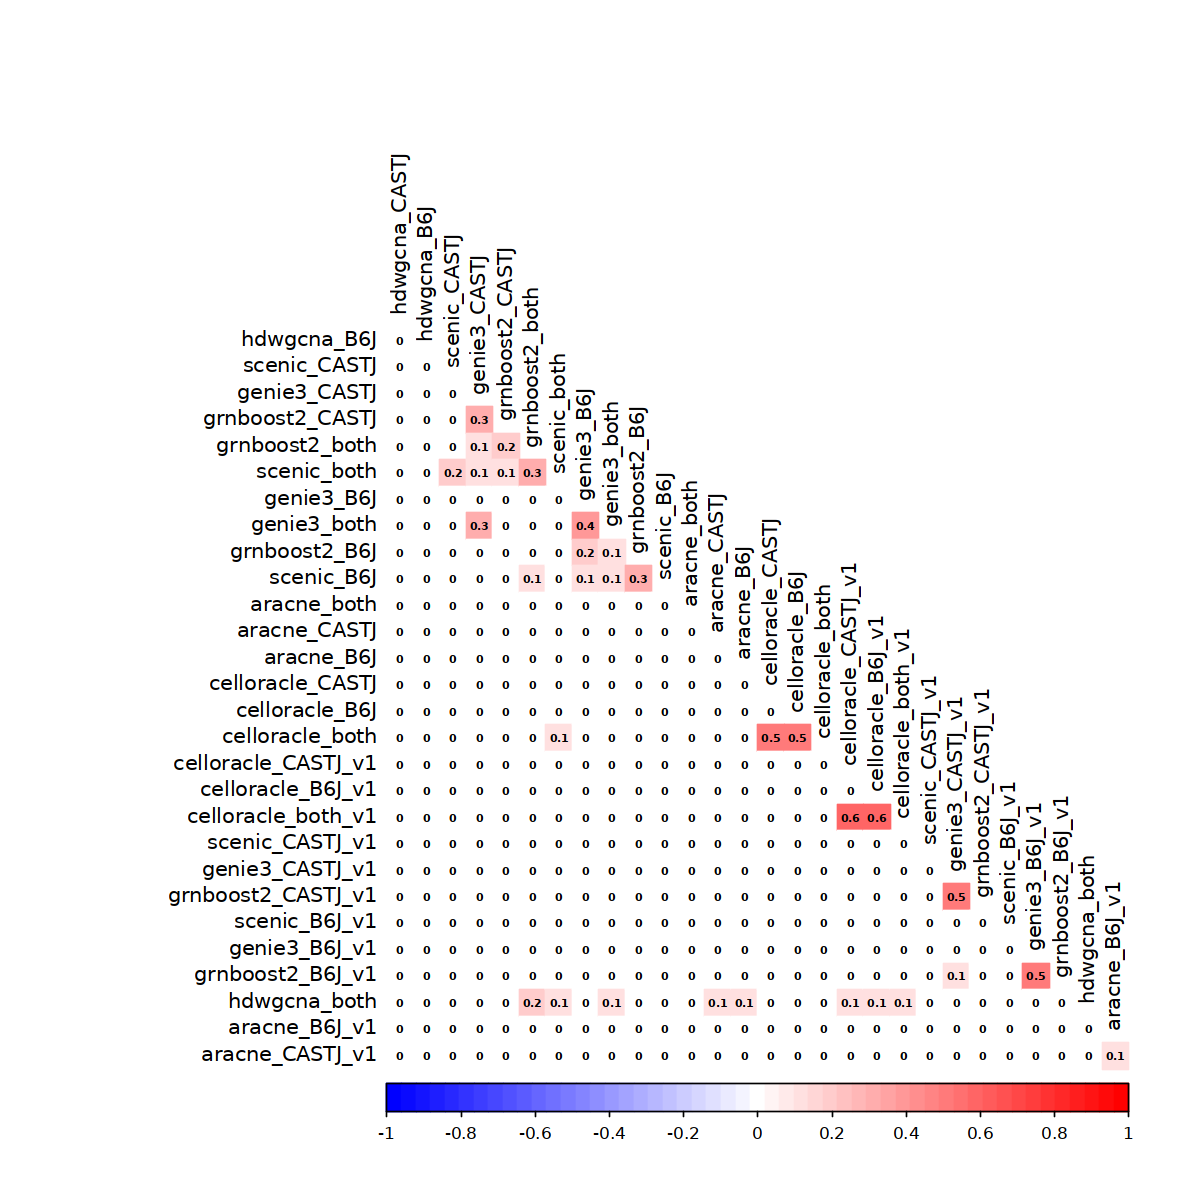

In [58]:
options(repr.plot.width=10, repr.plot.height=10)
corrplot(as.matrix(plot_df), method="color", type="lower", order="hclust", addCoef.col = "black", number.cex=0.5, tl.col="black", col=col, diag=FALSE)

In [39]:
library(ggplot2)

In [41]:
?ggcorr

No documentation for ‘ggcorr’ in specified packages and libraries:
you could try ‘??ggcorr’

In [ ]:
# Want to plot the lower triangle of this correlation matrix with row and column annotations


In [84]:
# Read the data
plot_df <- read.csv("/cellar/users/aklie/projects/igvf/topic_grn_links/grn_inference/celloracle/bin/igvf_b01_LeftCortex/plot_df.csv")

# Extract methods and data types from column names
methods <- sapply(strsplit(colnames(plot_df), "_"), "[", 1)
data_types <- sapply(strsplit(colnames(plot_df), "_"), "[", 2)
version <- sapply(strsplit(colnames(plot_df), "_"), "[", 3)

# Column annotations for the heatmap
ann_col <- data.frame(Methods = methods, DataTypes = data_types, Version = version)
rownames(ann_col) <- colnames(plot_df)

# Replace NA Version with "v2"
ann_col$Version[is.na(ann_col$Version)] <- "v2"

In [85]:
plot_df  <- plot_df - rowMeans(plot_df)
head(plot_df)

,aracne_B6J,aracne_B6J_v1,aracne_CASTJ,aracne_CASTJ_v1,aracne_both,celloracle_B6J,celloracle_B6J_v1,celloracle_CASTJ,celloracle_CASTJ_v1,celloracle_both,⋯,grnboost2_CASTJ_v1,grnboost2_both,hdwgcna_B6J,hdwgcna_CASTJ,hdwgcna_both,scenic_B6J,scenic_B6J_v1,scenic_CASTJ,scenic_CASTJ_v1,scenic_both
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.4137931,-1.4137931,39.5862069,-1.413793,-1.4137931,-1.4137931,-1.4137931,-1.4137931,-1.4137931,-1.4137931,⋯,-1.4137931,-1.4137931,-1.4137931,-1.4137931,-1.4137931,-1.4137931,-1.4137931,-1.4137931,-1.4137931,-1.4137931
2,44.4137931,-1.5862069,-1.5862069,-1.586207,-1.5862069,-1.5862069,-1.5862069,-1.5862069,-1.5862069,-1.5862069,⋯,-1.5862069,-1.5862069,-1.5862069,-1.5862069,-1.5862069,-1.5862069,-1.5862069,-1.5862069,-1.5862069,-1.5862069
3,-4.7586207,-4.7586207,-4.7586207,-4.758621,-4.7586207,-4.7586207,-4.7586207,-4.7586207,-4.7586207,-4.7586207,⋯,-4.7586207,-4.7586207,-4.7586207,-4.7586207,133.2413793,-4.7586207,-4.7586207,-4.7586207,-4.7586207,-4.7586207
4,-1.4137931,-1.4137931,39.5862069,-1.413793,-1.4137931,-1.4137931,-1.4137931,-1.4137931,-1.4137931,-1.4137931,⋯,-1.4137931,-1.4137931,-1.4137931,-1.4137931,-1.4137931,-1.4137931,-1.4137931,-1.4137931,-1.4137931,-1.4137931
5,-2.4137931,-2.4137931,-2.4137931,-2.413793,-2.4137931,-2.4137931,-2.4137931,-2.4137931,-2.4137931,-2.4137931,⋯,-2.4137931,-2.4137931,24.5862069,40.5862069,-2.4137931,-2.4137931,-2.4137931,-2.4137931,-2.4137931,-2.4137931
6,-0.1034483,-0.1034483,-0.1034483,2.896552,-0.1034483,-0.1034483,-0.1034483,-0.1034483,-0.1034483,-0.1034483,⋯,-0.1034483,-0.1034483,-0.1034483,-0.1034483,-0.1034483,-0.1034483,-0.1034483,-0.1034483,-0.1034483,-0.1034483


In [86]:
head(ann_col)

,Methods,DataTypes,Version
,<chr>,<chr>,<chr>
aracne_B6J,aracne,B6J,v2
aracne_B6J_v1,aracne,B6J,v1
aracne_CASTJ,aracne,CASTJ,v2
aracne_CASTJ_v1,aracne,CASTJ,v1
aracne_both,aracne,both,v2
celloracle_B6J,celloracle,B6J,v2


In [87]:
# Plotting colors
my.breaks <- c(seq(-5, -0.01, by=0.01), seq(0.01, 10, by=0.01))
my.colors <- c(colorRampPalette(colors = c("blue", "white"))(length(my.breaks)/2),
               colorRampPalette(colors = c("white", "red"))(length(my.breaks)/2))

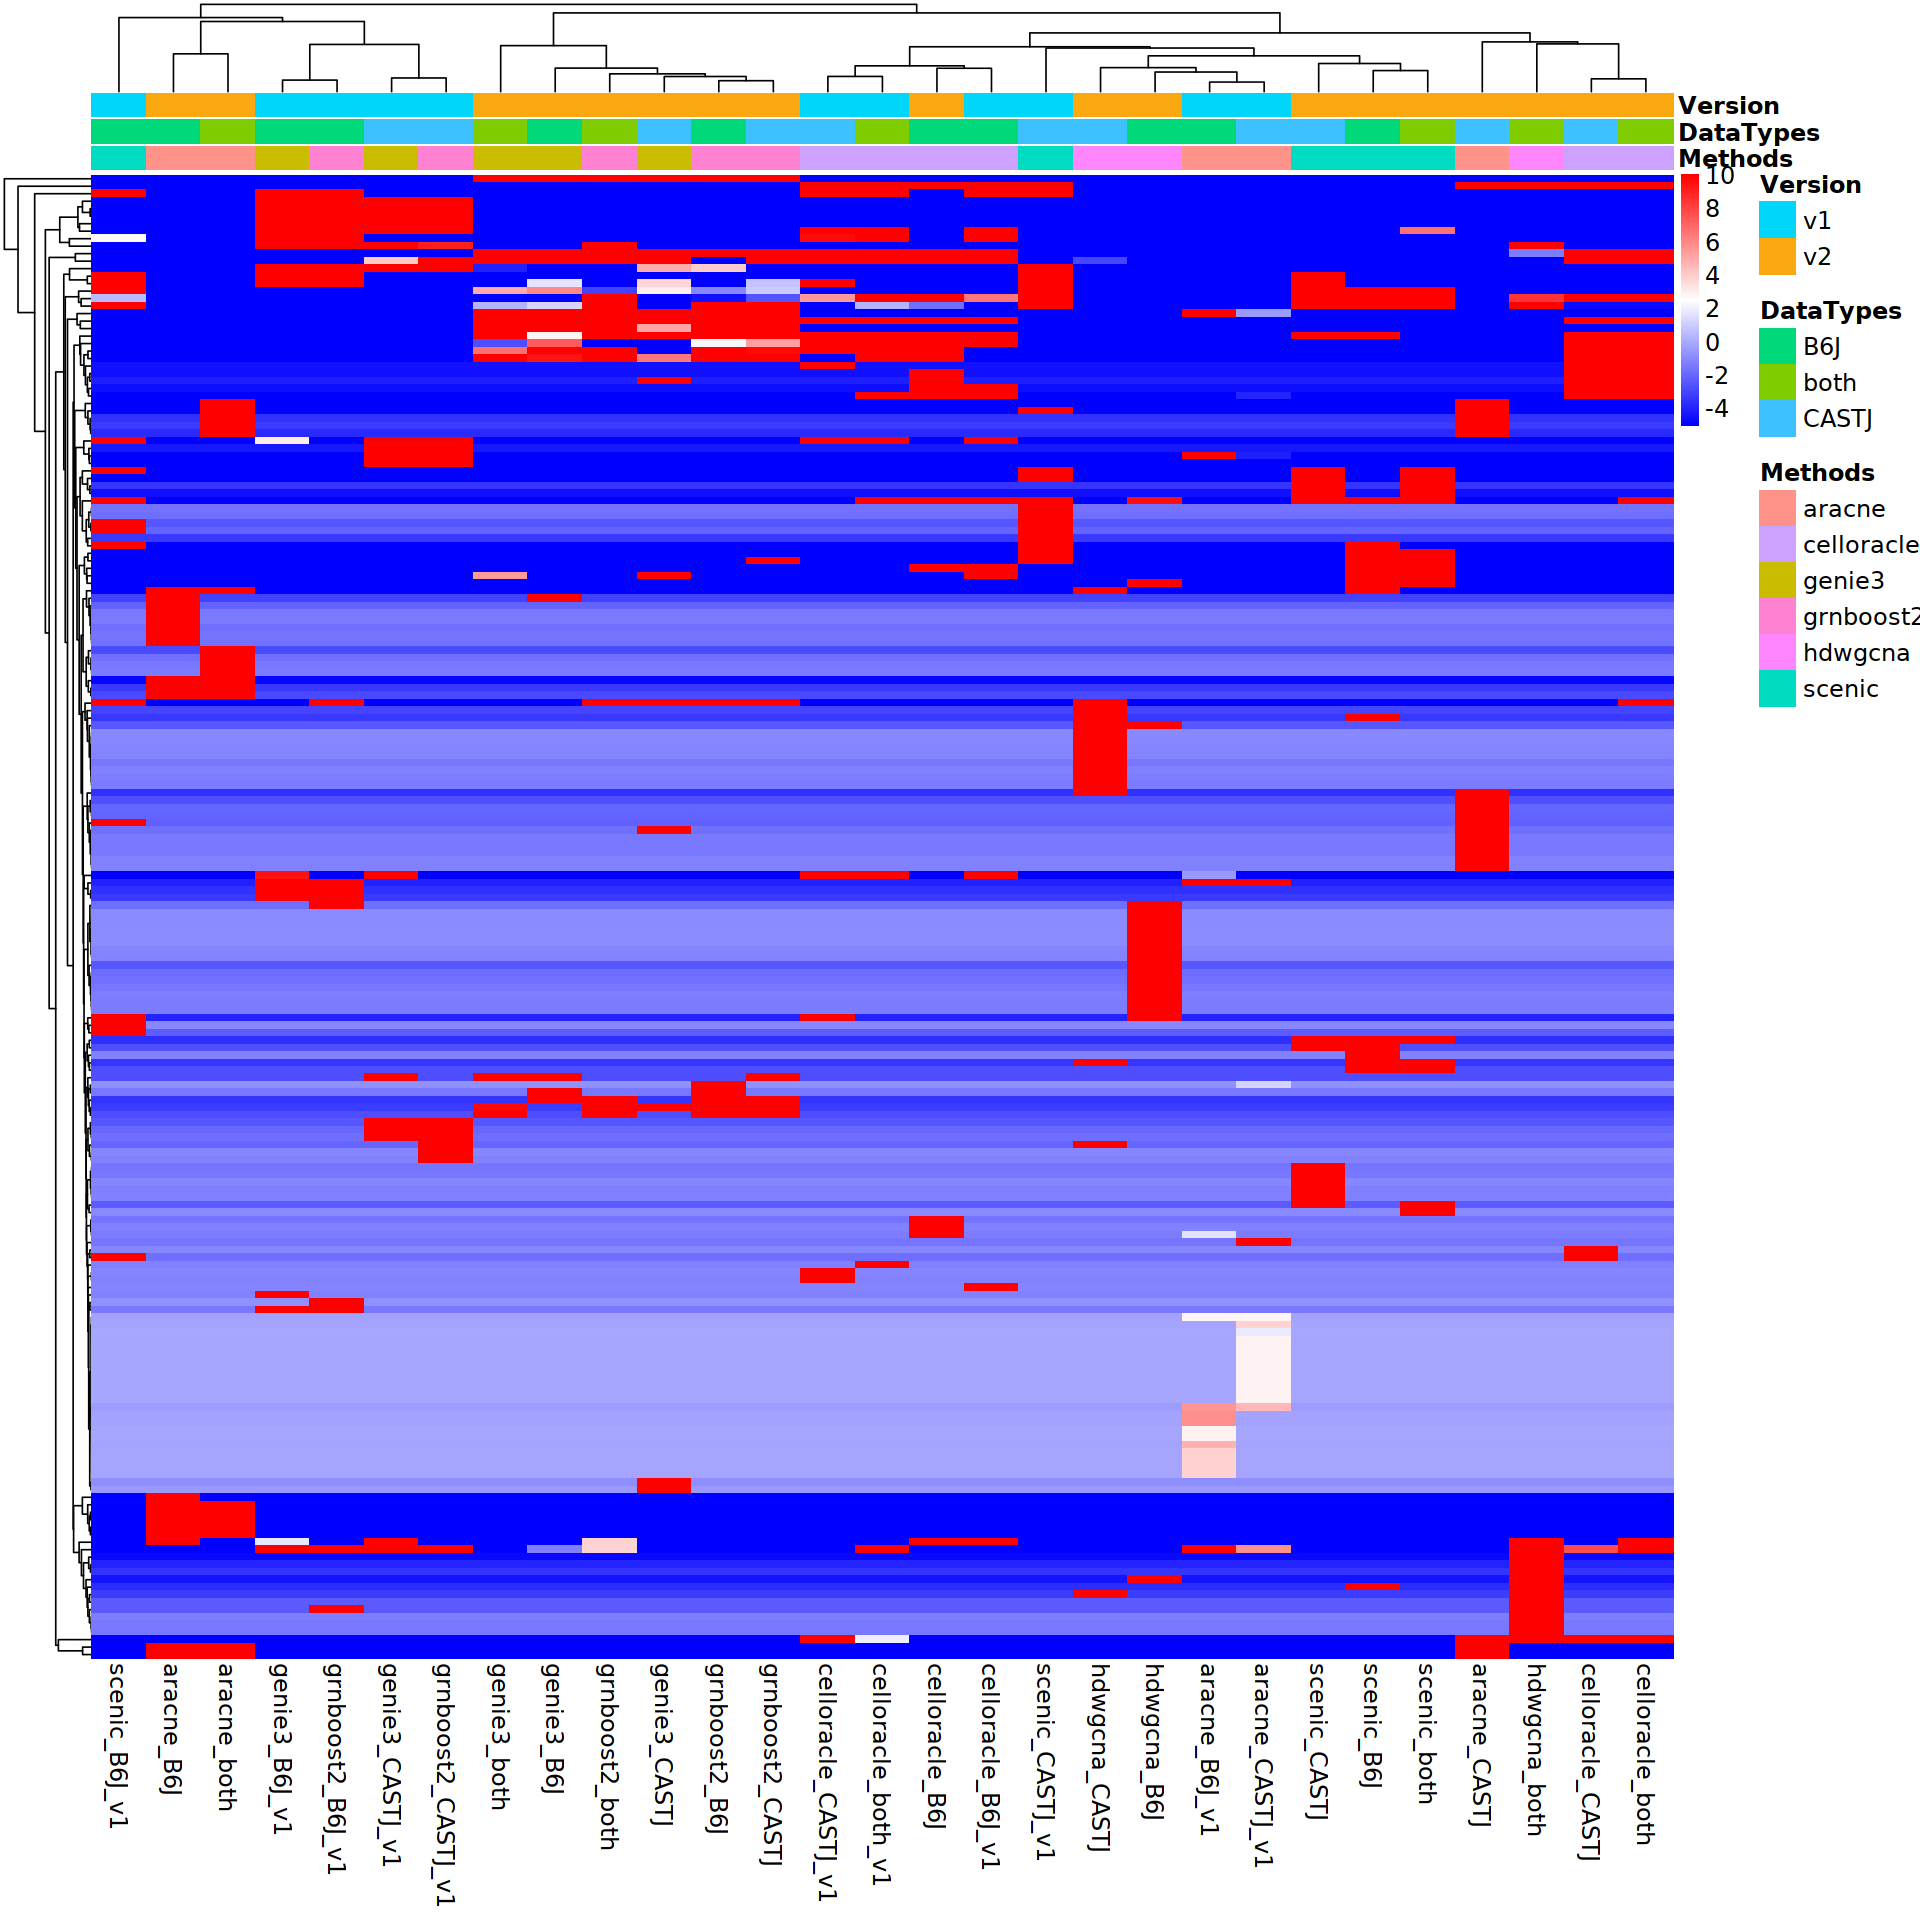

In [88]:
options(repr.plot.width = 16, repr.plot.height = 16)
pheatmap(
    plot_df, 
    fontsize=14,
    cluster_rows=TRUE, 
    show_rownames=FALSE, 
    cluster_cols=TRUE,
    annotation_col=ann_col,
    color=my.colors, 
    breaks=my.breaks
)

In [92]:
# Sort ann_col by "Method" then "DataType" then "Version" in R
ord_ann_col <- ann_col[order(ann_col$Method, ann_col$DataType, ann_col$Version), ]

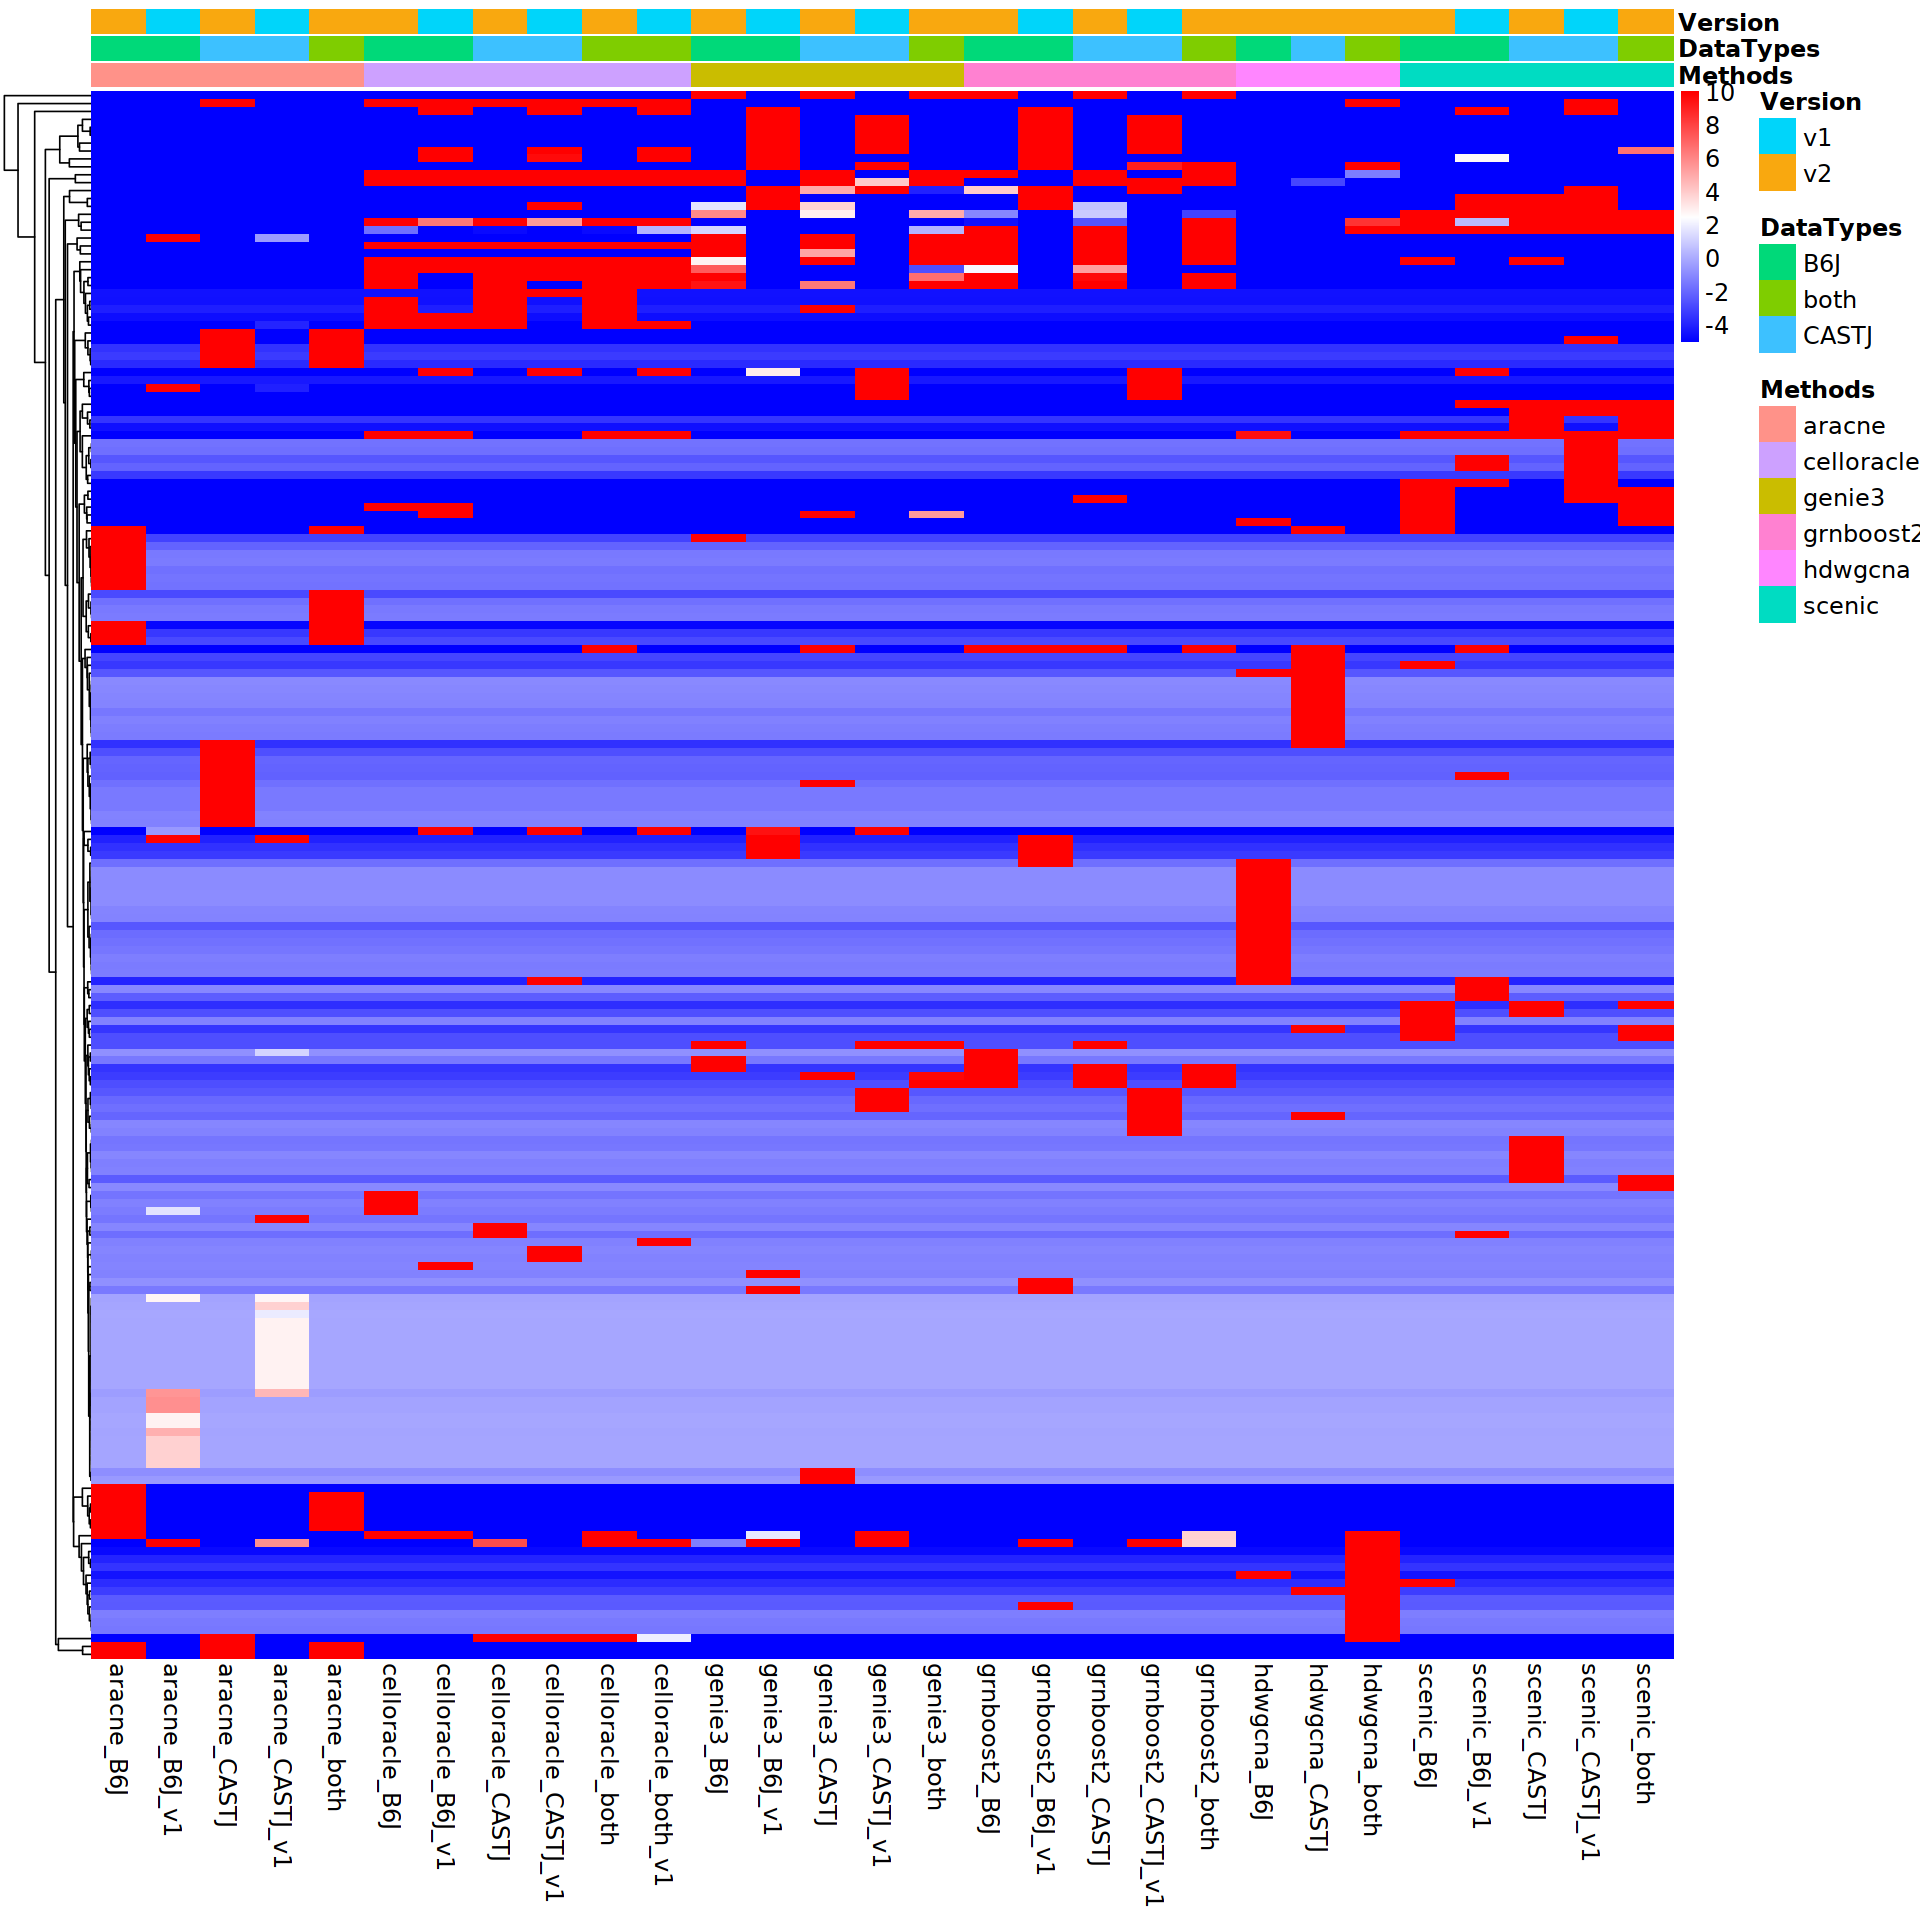

In [93]:
options(repr.plot.width = 16, repr.plot.height = 16)
pheatmap(
    plot_df, 
    fontsize=14,
    cluster_rows=TRUE, 
    show_rownames=FALSE, 
    cluster_cols=FALSE,
    annotation_col=ord_ann_col,
    color=my.colors, 
    breaks=my.breaks
)